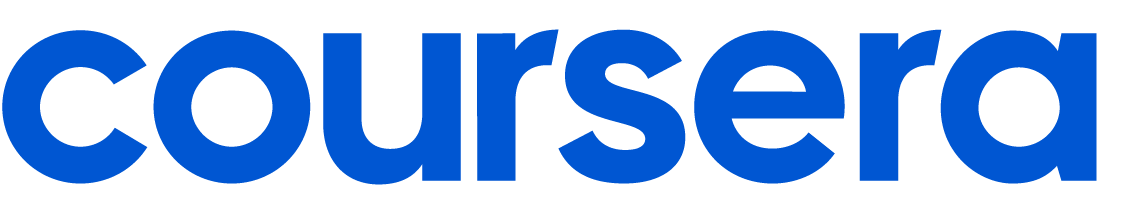

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
# Import any other packages you may want to use
# Preprocessing packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Additional Machine Learning / Classification packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# For feature engineering
from sklearn.preprocessing import KBinsDiscretizer

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
# Display shapes (If you want to see the shapes of the loaded dataframes)
print('train_df Shape:', train_df.shape)
print('test_df Shape:', test_df.shape)


# Split the data
X = train_df.drop(columns=['LoanID', 'Default'])
y = train_df['Default']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

train_df Shape: (255347, 18)
test_df Shape: (109435, 17)


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

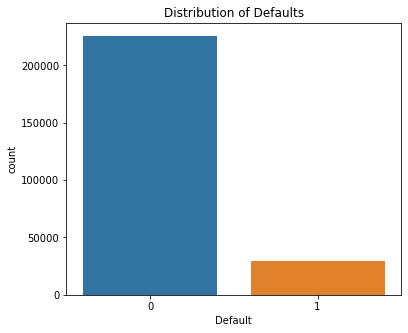

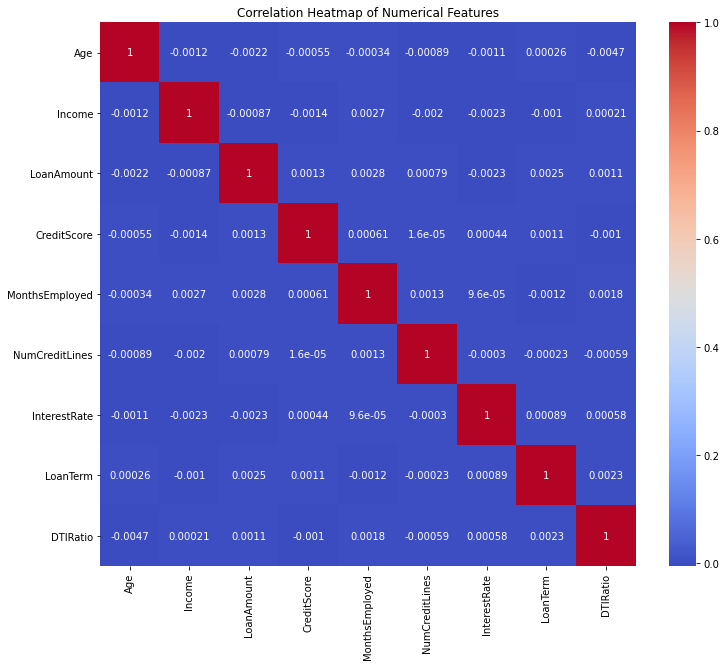

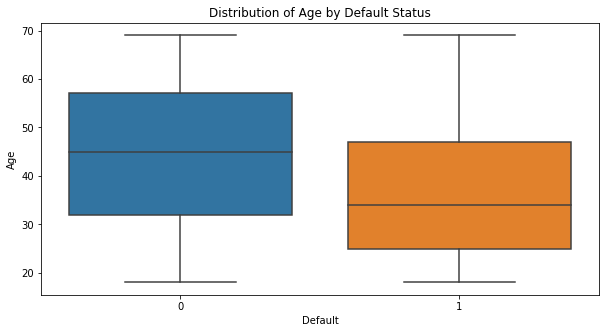

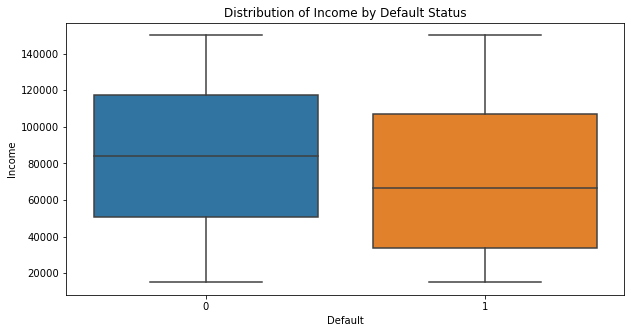

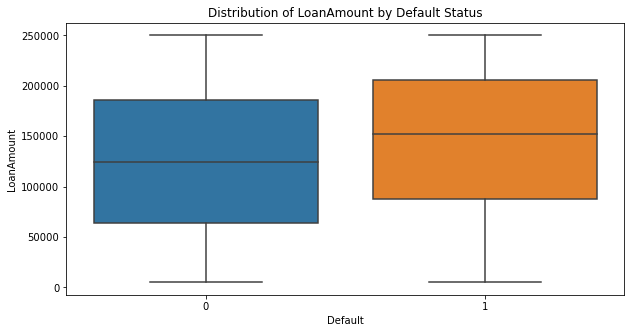

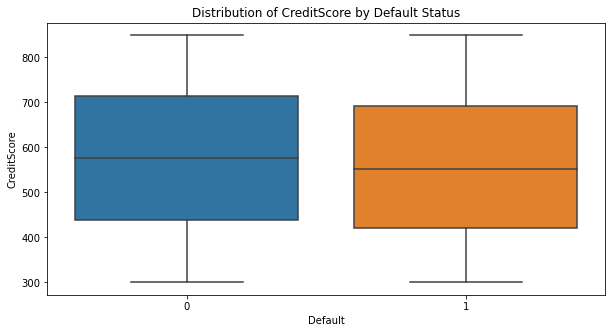

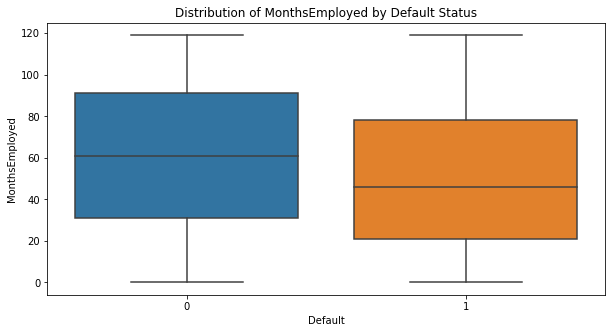

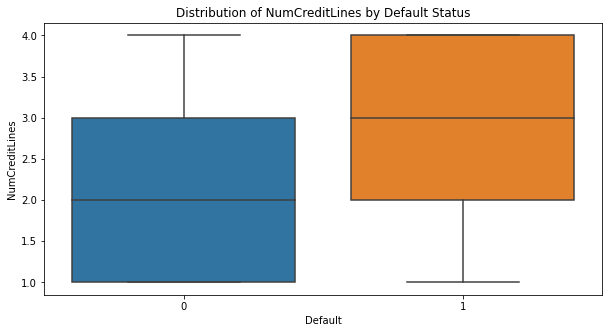

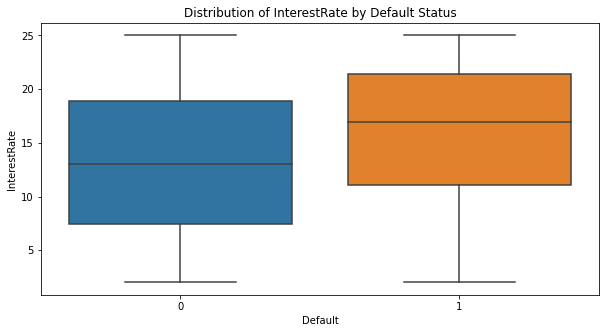

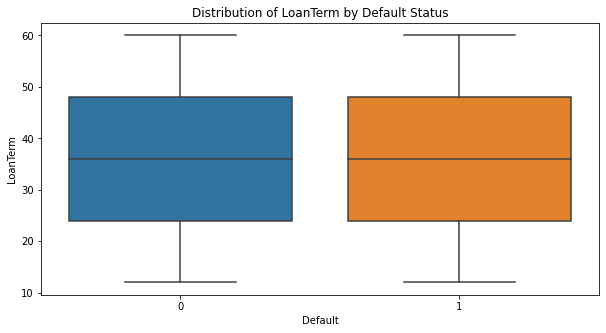

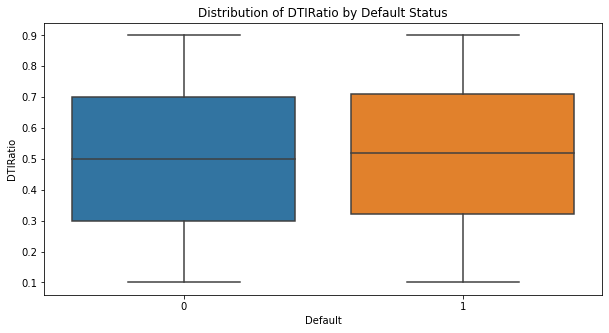

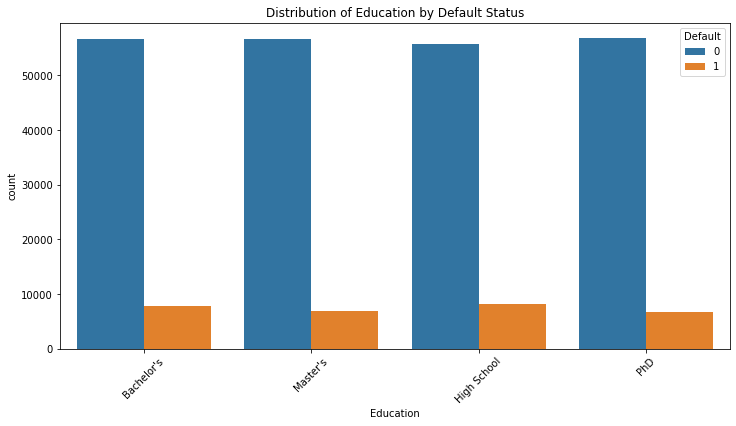

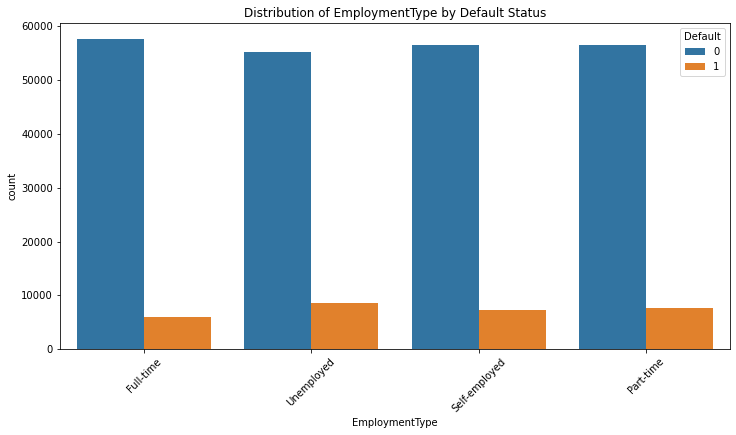

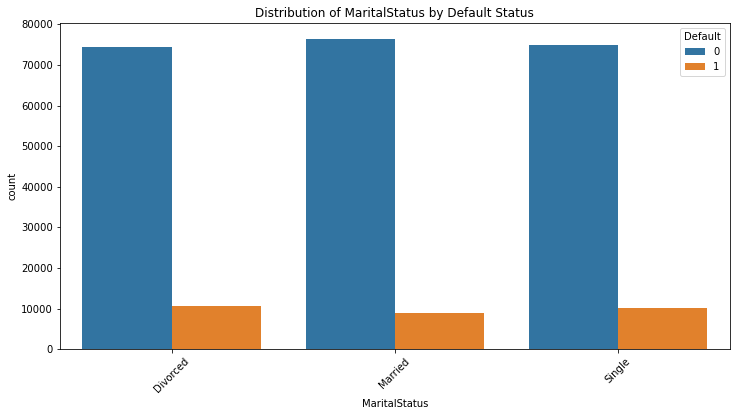

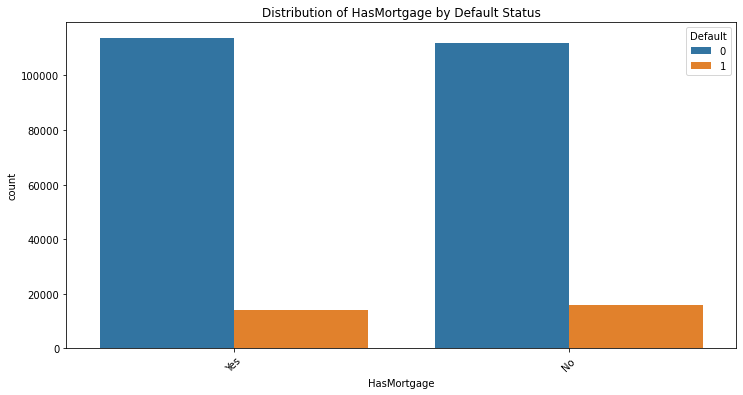

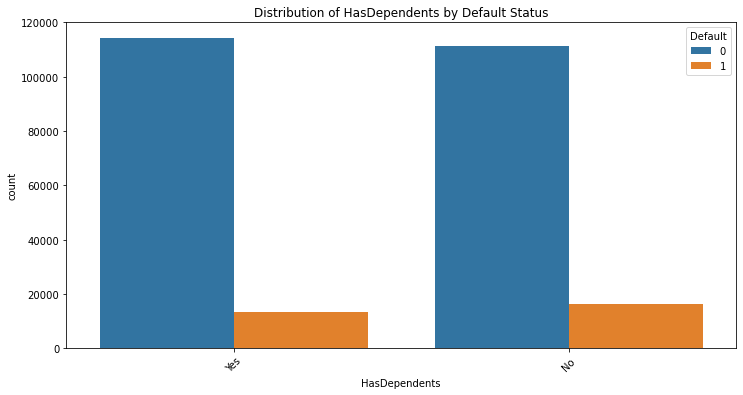

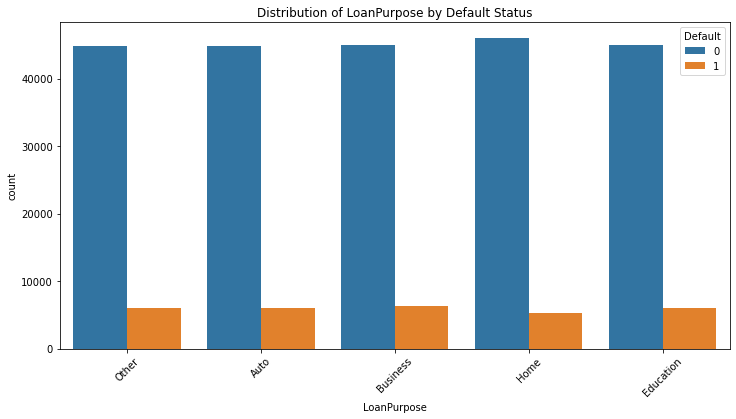

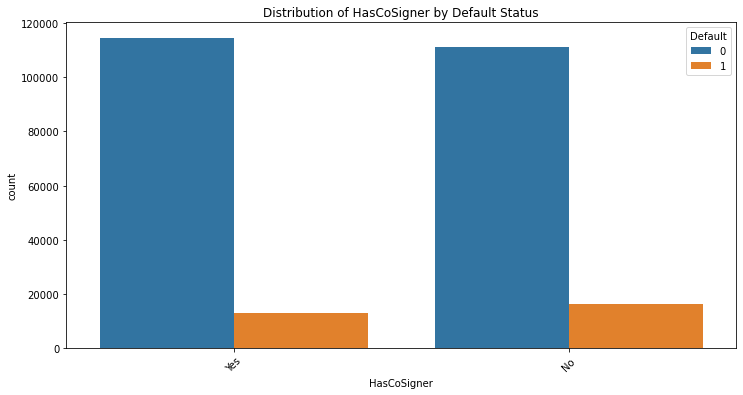

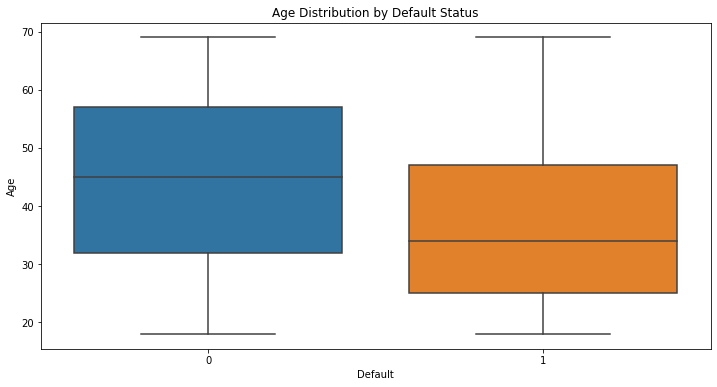

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


NameError: name 'numerical_cols' is not defined

In [6]:
# your code here (optional)

# Display the first few rows of the training dataset
print(train_df.head())

# Display data types and check for missing values
print(train_df.info())


# Fill numerical columns with the median
for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64']:
        train_df[col].fillna(train_df[col].median(), inplace=True)

# Fill categorical columns with the mode
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        
# Display a description of the data
print(train_df.describe())
train_df = pd.read_csv("train.csv")

# Numerical features
for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64']:
        train_df[col].fillna(train_df[col].median(), inplace=True)

# Categorical features
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of the target variable (Default)
plt.figure(figsize=(6, 5))
sns.countplot(train_df['Default'])
plt.title('Distribution of Defaults')
plt.show()

# 2. Correlation heatmap of numerical features
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).drop(columns=['Default'])
correlation = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Distribution of numerical features against the target variable
for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x='Default', y=column)
    plt.title(f'Distribution of {column} by Default Status')
    plt.show()

# 4. Distribution of categorical features against the target variable
categorical_features = train_df.select_dtypes(include=['object']).drop(columns=['LoanID'])  # Assuming LoanID is the only non-feature object column

for column in categorical_features.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=train_df, x=column, hue='Default')
    plt.title(f'Distribution of {column} by Default Status')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the distribution of 'Age' against the 'Default' column
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Default', y='Age')
plt.title('Age Distribution by Default Status')
plt.show()

# Check for missing values
print(train_df.isnull().sum())
train_df.fillna(train_df.mean(), inplace=True)  # Mean imputation

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train_df[numerical_cols] = imputer.fit_transform(train_df[numerical_cols])


# Using IQR for outlier detection and removal
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Handle Missing Values
train_df.fillna(train_df.median(), inplace=True)

# Using IQR for outlier detection and removal
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]



# Example: Mean imputation for a column named 'income'
train_df['income'].fillna(train_df['income'].mean(), inplace=True)


# Visualizing the distribution of features using histograms
train_df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

# Exclude non-numeric columns and columns like 'LoanID'
columns_to_plot = train_df.select_dtypes(include=[float, int]).columns.drop('LoanID', errors='ignore')

for column in columns_to_plot:
    plt.figure()
    train_df.boxplot([column])

plt.show()


# Handling outliers and missing data will depend on the results from the above visualizations and counts.

# Step 2: Feature Engineering

# Here's an example of creating a polynomial feature for a column named 'feature1'
# You can replicate this for other features or create interaction terms

from sklearn.preprocessing import KBinsDiscretizer

# Binning the Age into categories
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
train_df['Age_bins'] = age_discretizer.fit_transform(train_df[['Age']])
test_df['Age_bins'] = age_discretizer.transform(test_df[['Age']])

train_df['income_loan_interaction'] = train_df['Income'] * train_df['LoanAmount']
train_df['income_bins'] = pd.cut(train_df['Income'], bins=5, labels=False)


from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_poly = poly.fit_transform(train_df.select_dtypes(['int64', 'float64']))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)


# Create interaction terms (Example: Income and LoanAmount)
train_df['Income_LoanAmount'] = train_df['Income'] * train_df['LoanAmount']
test_df['Income_LoanAmount'] = test_df['Income'] * test_df['LoanAmount']
train_df['income_squared'] = train_df['income'] ** 2
test_df['income_squared'] = test_df['income'] ** 2
train_df['income_age_interaction'] = train_df['income'] * train_df['age']
test_df['income_age_interaction'] = test_df['income'] * test_df['age']
train_df['interaction_term'] = train_df['feature_A'] * train_df['feature_B']
train_df['feature_squared'] = train_df['feature']**2
train_df = pd.get_dummies(train_df, drop_first=True)
train_df = pd.get_dummies(train_df, drop_first=True)


print(train_df.head())


# NOTE: Always ensure that any feature engineering done on the training data is also applied to the test data.

# Step 3: Feature Selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler


from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=XGBClassifier()).fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_valid_selected = selector.transform(X_valid)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df[feature_columns])  # Replace 'feature_columns' with your columns list
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(scaled_features, train_df['Default'])


scaler = StandardScaler()

correlation_matrix = train_df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
train_df.drop(to_drop, axis=1, inplace=True)


models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC(probability=True)]
for model in models:
    model.fit(X_train, y_train)
    # Check performance on validation set
    
# Interaction term for Income and LoanAmount
train_df['Income_LoanAmount'] = train_df['Income'] * train_df['LoanAmount']

# Binning Age into categories
train_df['Age_bins'] = pd.cut(train_df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60+'])

# One-hot encoding for categorical features
train_df = pd.get_dummies(train_df, drop_first=True)

    
# One-hot encoding
train_df_encoded = pd.get_dummies(train_df.drop(['LoanID'], axis=1))
test_df_encoded = pd.get_dummies(test_df.drop(['LoanID'], axis=1))
test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)



# Assume X_train and X_test are your training and test feature sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42, solver='saga')
rfe = RFE(model, 5) # Here 5 is the number of top features to select. You can adjust this.
fit = rfe.fit(X_train, y_train)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(train_df, train_df['Default'])


import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)


X = train_df.drop(columns=['LoanID', 'Default'])
y = train_df['Default']

model = LogisticRegression()
rfe = RFE(model, 10)  # Here, we're selecting the top 10 features
fit = rfe.fit(X, y)
selected_features = X.columns[fit.support_]


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

# Predicting on validation set
y_pred = gbm.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred)
print(f"ROC AUC Score: {roc_auc}")

# Print the top features
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Step 4: Algorithm Experimentation

import xgboost as xgb
from sklearn.metrics import roc_auc_score

X = train_df_encoded.drop(columns=['Default'])
y = train_df_encoded['Default']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, y_pred)
print(f"ROC AUC Score: {roc_auc}")

# Trying out a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
rf_probs = rf_model.predict_proba(X_valid)[:, 1]

# Step 5: Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV


from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(space):
    classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                                    max_depth = int(space['max_depth']),
                                    learning_rate = space['learning_rate'])
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, pred)
    return {'loss': -accuracy, 'status': STATUS_OK }

space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5))
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=Trials())

param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(gbm, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")


param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, verbose=3, random_state=42)
random_search.fit(X, y)

print(f"Best ROC AUC Score: {random_search.best_score_}")
print(f"Best Parameters: {random_search.best_params_}")


from sklearn.metrics import f1_score

y_probs = model.predict_proba(X_valid)[:, 1]
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_valid, (y_probs > t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]


model_1_probs = model_1.predict_proba(X_valid)[:, 1]
model_2_probs = model_2.predict_proba(X_valid)[:, 1]

ensemble_probs = (model_1_probs + model_2_probs) / 2

# Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print(grid_search.best_params_)


data.isnull().sum()
Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

data.describe()
data.hist( figsize = (22, 20) )
plt.show()


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('xgb', XGBClassifier())
]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_valid, y_valid)

from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


# Split the data
X = train_df.drop(columns=['LoanID', 'Default'])
y = train_df['Default']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# One-hot encode the training data
X_train_encoded = pd.get_dummies(X_train)

# Assuming you used pd.get_dummies for one-hot encoding on the training data:
X_train_encoded = pd.get_dummies(X_train)

# One-hot encode the test data and ensure it has the same columns as the training data
test_df_encoded = pd.get_dummies(test_df.drop(['LoanID'], axis=1))
test_df_encoded = test_df_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


# One-hot encode the validation data and ensure it has the same columns as the training data
X_valid_encoded = pd.get_dummies(X_valid)
X_valid_encoded = X_valid_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Initialize and train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42, solver='saga')
logistic_model.fit(X_train_encoded, y_train)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

# One-hot encode the test data to match the columns of X_train_encoded
test_df_encoded = pd.get_dummies(test_df.drop(['LoanID'], axis=1))
test_df_encoded = test_df_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Predict using the encoded test data
predicted_probability = logistic_model.predict_proba(test_df_encoded)[:, 1]


bagging = BaggingClassifier(base_estimator=XGBClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)




In [ ]:
# Predict the probabilities on the test set
predicted_probability = logistic_model.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]
predicted_probability = logistic_model.predict_proba(test_df_encoded)[:, 1]


In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head()

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Save the prediction dataframe to a CSV file
prediction_df.to_csv("prediction_submission.csv", index=False)

# Load the saved CSV file into a dataframe
submission = pd.read_csv("prediction_submission.csv")




In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Ensure the column names are correct
assert submission.columns[0] == 'LoanID', 'The first column name should be LoanID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'



In [ ]:
# Ensure the dataframe has the correct number of rows and columns
assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Ensure the dataframe has the correct number of rows and columns

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'


In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!